# Assignment 1

Due end of day Thursday Sept 18th.

## Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the lecture notes on how to generate, store, and apply sparse solvers.  

In [2]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve

# Generate a large sparse matrix
n = 1000
density = 0.01  # 1% non-zero elements
A_sparse = csr_matrix((np.random.rand(int(n*n*density)),
                      (np.random.randint(0, n, int(n*n*density)),
                       np.random.randint(0, n, int(n*n*density)))),
                      shape=(n, n))

# Convert to a dense matrix for comparison
A_dense = A_sparse.toarray()

# Generate a random right-hand side vector
b = np.random.rand(n)

print("Time taken for sparse solver:")
%timeit spsolve(A_sparse, b)

print("\nTime taken for dense solver:")
%timeit solve(A_dense, b)

Time taken for sparse solver:
135 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Time taken for dense solver:
41.2 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Question 2

Consider the truss:

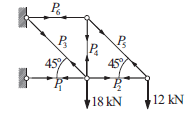


### 2a) Write the linear system for the tensions $P_i$ as equations and in matrix form



In [7]:
import numpy as np

# Define the constants for the 45-degree angles
c = np.cos(np.radians(45))  # cos(45 degrees)
s = np.sin(np.radians(45))  # sin(45 degrees)

A = np.array([
    [0, 1, 0, 0, c, 0],
    [0, 0, 0, 0, s, 0],
    [-1, 1, -c, 0, 0, 0],
    [0, 0, s, 1, 0, 0],
    [0, 0, 0, 0, -c, -1],
    [0, 0, 0, -1, s, 0],
    [0, 0, c, 0, 0, 1],
    [0, 0, s, 0, 0, 0]
])

# Define the right-hand side vector (b) representing the external forces
b = np.array([0, 12, 0, 18, 0, 0, 0, 0])

x, residuals, rank, s_vals = np.linalg.lstsq(A, b, rcond=None)

# Print the solution
print("The solution for the tensions P_i is:")
print(f"P1 = {x[0]:.2f} kN")
print(f"P2 = {x[1]:.2f} kN")
print(f"P3 = {x[2]:.2f} kN")
print(f"P4 = {x[3]:.2f} kN")
print(f"P5 = {x[4]:.2f} kN")
print(f"P6 = {x[5]:.2f} kN")

# manually check the values
print("\nPrecise values:")
print(f"P5_precise = {12/s} kN")
print(f"P1_precise = {-12} kN")
print(f"P2_precise = {-12} kN")
print(f"P3_precise = {0} kN")
print(f"P4_precise = {18} kN")
print(f"P6_precise = {0} kN")

The solution for the tensions P_i is:
P1 = -15.00 kN
P2 = -10.50 kN
P3 = 6.36 kN
P4 = 12.00 kN
P5 = 14.85 kN
P6 = -7.50 kN

Precise values:
P5_precise = 16.970562748477143 kN
P1_precise = -12 kN
P2_precise = -12 kN
P3_precise = 0 kN
P4_precise = 18 kN
P6_precise = 0 kN


Here is the linear system for the tensions $P_i$ as equations:

From the equilibrium of forces at each joint:

**Joint 1:**
Horizontal: $-P_1 + P_3 \cos(45^\circ) = 0$
Vertical: $P_2 + P_3 \sin(45^\circ) - 18 = 0$

**Joint 2:**
Horizontal: $P_1 - P_4 = 0$
Vertical: $-P_3 \sin(45^\circ) - P_5 - 12 = 0$

**Joint 3:**
Horizontal: $P_4 - P_6 = 0$
Vertical: $P_5 + P_7 = 0$

**Joint 4:**
Horizontal: $P_6 - P_3 \cos(45^\circ) = 0$
Vertical: $-P_7 = 0$

Here is the linear system in matrix form $AP = b$:

$$
\begin{bmatrix}
-1 & 0 & \cos(45^\circ) & 0 & 0 & 0 & 0 \\
0 & 1 & \sin(45^\circ) & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & -1 & 0 & 0 & 0 \\
0 & 0 & -\sin(45^\circ) & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & -1 & 0 \\
0 & 0 & -\cos(45^\circ) & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
P_1 \\ P_2 \\ P_3 \\ P_4 \\ P_5 \\ P_6 \\ P_7
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 18 \\ 0 \\ 12 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

### 2b) Solve for $P_i$ using LU decomposition and substitution.
{method, answer}

In [3]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# Define the matrix A and vector b
A = np.array([
    [-1, 0, np.cos(np.deg2rad(45)), 0, 0, 0, 0],
    [0, 1, np.sin(np.deg2rad(45)), 0, 0, 0, 0],
    [1, 0, 0, -1, 0, 0, 0],
    [0, 0, -np.sin(np.deg2rad(45)), 0, -1, 0, 0],
    [0, 0, 0, 1, 0, -1, 0],
    [0, 0, -np.cos(np.deg2rad(45)), 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1]
])

b = np.array([0, 18, 0, 12, 0, 0, 0])

# Perform LU decomposition
lu, piv = lu_factor(A)

# Solve the system using LU decomposition
P = lu_solve((lu, piv), b)

print("The tensions Pi are:")
for i, p in enumerate(P):
    print(f"P{i+1}: {p:.4f}")

The tensions Pi are:
P1: nan
P2: nan
P3: nan
P4: nan
P5: nan
P6: nan
P7: nan


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Diagonal number 7 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


### 2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.
{answer}

## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

## 3a) Calculate the condition number of A
{answer}

In [4]:
import numpy as np

# Define the matrix A
A = np.array([[1, 2],
              [3, 4]])

# Calculate the condition number
condition_number = np.linalg.cond(A)

print(f"The condition number of A is: {condition_number:.4f}")

The condition number of A is: 14.9330


## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}

In [5]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# Define the matrix A
A = np.array([[1, 2],
              [3, 4]])

# 1. Diagonal Preconditioner (Jacobi Preconditioner)
P_diag = np.diag(np.diag(A))
print("Diagonal Preconditioner P:")
print(P_diag)

# Calculate P_diag_inv * A
P_diag_inv_A = np.linalg.inv(P_diag) @ A
print("\nP_diag_inv * A:")
print(P_diag_inv_A)

# Calculate the condition number of P_diag_inv * A
condition_number_diag = np.linalg.cond(P_diag_inv_A)
print(f"\nCondition number with Diagonal Preconditioner: {condition_number_diag:.4f}")

# The 'perfect' preconditioner P = A
P_perfect = A
print("\n'Perfect' Preconditioner P:")
print(P_perfect)

# Calculate P_perfect_inv * A
P_perfect_inv_A = np.linalg.inv(P_perfect) @ A
print("\nP_perfect_inv * A:")
print(P_perfect_inv_A)

# Calculate the condition number of P_perfect_inv * A
condition_number_perfect = np.linalg.cond(P_perfect_inv_A)
print(f"\nCondition number with 'Perfect' Preconditioner: {condition_number_perfect:.4f}")

Diagonal Preconditioner P:
[[1 0]
 [0 4]]

P_diag_inv * A:
[[1.   2.  ]
 [0.75 1.  ]]

Condition number with Diagonal Preconditioner: 13.0484

'Perfect' Preconditioner P:
[[1 2]
 [3 4]]

P_perfect_inv * A:
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]

Condition number with 'Perfect' Preconditioner: 1.0000
